### 1. Giới thiệu về gộp nhóm (Grouping) và thống kê dùng crosstab trong Pandas  

Pandas cung cấp các phương thức mạnh mẽ để thực hiện các phép gộp nhóm (grouping) và thống kê (aggregation) nhằm phân tích và xử lý dữ liệu theo nhóm.  

Công thức chung của groupby() trong Pandas như sau:  

**df.groupby(by)[column].agg(func)**  
Trong đó:  

* df: DataFrame cần gộp nhóm.  
* by: Tên cột hoặc danh sách các cột dùng để nhóm dữ liệu.  
* column (tuỳ chọn): Cột cần thực hiện phép toán thống kê. Nếu không chỉ định, toàn bộ DataFrame sẽ được gộp nhóm.  
* agg(func) (tuỳ chọn): Áp dụng một hoặc nhiều phép toán thống kê lên nhóm.  


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cho bộ dữ liệu về xe hơi với các thông tin liên quan:
# có 206 hàng và 26 cột, với các thông tin liên quan đến xe hơi như sau :
# symboling: Điểm số rủi ro của xe.
# normalized-losses: Tổn thất chuẩn hóa (có nhiều giá trị bị thiếu, được ký hiệu bằng '?').
# make: Nhãn hiệu xe.
# fuel-type: Loại nhiên liệu (gas, diesel).
# aspiration: Kiểu nạp khí (std, turbo).
# num-of-doors: Số cửa (two, four).
# body-style: Kiểu dáng thân xe (convertible, sedan, hatchback, v.v.).
# drive-wheels: Hệ dẫn động (fwd, rwd, 4wd).
# engine-location: Vị trí động cơ (front, rear).
# wheel-base: Chiều dài cơ sở.
# length, width, height: Kích thước của xe.
# curb-weight: Trọng lượng xe.
# engine-type: Loại động cơ.
# num-of-cylinders: Số xy-lanh.
# engine-size: Dung tích động cơ.
# fuel-system: Hệ thống nhiên liệu.
# bore, stroke: Các thông số liên quan đến xy-lanh.
# compression-ratio: Tỷ lệ nén.
# horsepower: Công suất động cơ.
# peak-rpm: Tốc độ vòng quay tối đa.
# city-mpg, highway-mpg: Mức tiêu thụ nhiên liệu trong thành phố và trên xa lộ.
# price: Giá bán của xe.


In [2]:
# Đọc dữ liệu 
cars = pd.read_csv('data_bai_7/auto.csv')

# Dùng .head() hoặc .tail() để xem trước dữ5 dòng liệu:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Trước khi thức hiện các phép tính toán thống kê cũng như gộp nhóm.... ta phải xử lý, làm sạch dữ liệu trước   

### 1. Làm sạch dữ liệu  
Làm sạch dữ liệu là một bước quan trọng trong xử lý dữ liệu, giúp đảm bảo dữ liệu không có giá trị sai, thiếu hoặc dư thừa trước khi thực hiện phân tích.   
Pandas cung cấp nhiều công cụ mạnh mẽ để làm sạch dữ liệu một cách hiệu quả.  

#### a. Kiểm tra dữ liệu  
Trước khi làm sạch dữ liệu, cần kiểm tra xem dữ liệu có vấn đề gì không. Một số phương pháp kiểm tra phổ biến:


In [3]:
# Xem tổng quan dữ liệu
# Dùng .info() để kiểm tra kiểu dữ liệu và số lượng giá trị thiếu.

#  normalized-losses  206 non-null    object ==> Nhưng có giá trị bị thiếu là  ? ở nhiều cột như num-of-doors , price ....
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          206 non-null    int64  
 1   normalized-losses  206 non-null    object 
 2   make               206 non-null    object 
 3   fuel-type          206 non-null    object 
 4   aspiration         206 non-null    object 
 5   num-of-doors       206 non-null    object 
 6   body-style         206 non-null    object 
 7   drive-wheels       206 non-null    object 
 8   engine-location    206 non-null    object 
 9   wheel-base         206 non-null    float64
 10  length             206 non-null    float64
 11  width              206 non-null    float64
 12  height             206 non-null    float64
 13  curb-weight        206 non-null    int64  
 14  engine-type        206 non-null    object 
 15  num-of-cylinders   206 non-null    object 
 16  engine-size        206 non

In [4]:
# Dùng .describe() để xem các thống kê tổng quát (áp dụng cho dữ liệu số). 
cars.describe() 


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,0.844660,98.776699,174.095146,65.916505,53.716505,2557.606796,127.121359,10.138447,25.194175,30.718447
std,1.251398,6.014003,12.324763,2.143605,2.440516,520.234062,41.654442,3.962775,6.536290,6.885712
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.425000,64.100000,52.000000,2151.000000,97.250000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.400000,66.900000,55.500000,2947.750000,144.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
cars.applymap(lambda x: '?' in str(x))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
cars.applymap(lambda x: '?' in str(x)).any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [7]:
cars.applymap(lambda x: '?' in str(x)).any(axis=1)

0       True
1       True
2       True
3      False
4      False
       ...  
201    False
202    False
203    False
204    False
205    False
Length: 206, dtype: bool

In [8]:
# Lọc các dòng chứa dấu ? tạo ta một series mask 
mask = cars.applymap(lambda x: '?' in str(x)).any(axis=1)
cars_with_question_mark = cars[mask]

display(cars_with_question_mark)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [9]:
# Lọc các dòng không chứa dấu ? dùng dấu ~
mask = cars.applymap(lambda x: '?' in str(x)).any(axis=1)
cars_with_question_mark = cars[~mask]

display(cars_with_question_mark)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [10]:
# Xem thử vài dòng có ký tự lạ như  ? 
cars.iloc[[0, 1, 2, 9, 27]]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558


In [11]:
# Dùng .isnull().sum() để kiểm tra giá trị thiếu trong từng cột:
print(cars.isnull().sum())
# Không null nhưng có dấu ? pandas hiểu ? như là dạng dữ liệu không null 

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [12]:
# Thay thế tất cả giá trị '?' (bị thiếu) thành None
cars = cars.replace('?', None)
cars.iloc[[0, 1, 2, 9, 27]]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,None,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
9,0,None,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,None
27,1,148,dodge,gas,turbo,None,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558


In [13]:
# Dùng .isnull().sum() để kiểm tra giá trị thiếu trong từng cột:
print(cars.isnull().sum())
# Null rất nhiều ==> phải xử lý  

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


#### b. Xử lý giá trị thiếu (Missing Values)    
Giá trị thiếu có thể ảnh hưởng đến việc phân tích dữ liệu, vì vậy cần xử lý chúng bằng cách loại bỏ hoặc thay thế.  


In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          206 non-null    int64  
 1   normalized-losses  165 non-null    object 
 2   make               206 non-null    object 
 3   fuel-type          206 non-null    object 
 4   aspiration         206 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         206 non-null    object 
 7   drive-wheels       206 non-null    object 
 8   engine-location    206 non-null    object 
 9   wheel-base         206 non-null    float64
 10  length             206 non-null    float64
 11  width              206 non-null    float64
 12  height             206 non-null    float64
 13  curb-weight        206 non-null    int64  
 14  engine-type        206 non-null    object 
 15  num-of-cylinders   206 non-null    object 
 16  engine-size        206 non

In [16]:
# Xoá giá trị bị thiếu , Nếu dữ liệu thiếu không đáng kể, ta có thể xóa chúng: 
# df_cleaned = df.dropna()        # Xóa tất cả các hàng có giá trị thiếu
# df_cleaned = df.dropna(axis=1)  # Xóa tất cả các cột có giá trị thiếu


In [17]:
# Dùng tham số thresh để giữ lại hàng có ít nhất một số lượng giá trị không thiếu nhất định: 
# df_cleaned = df.dropna(thresh=3)  # Chỉ xóa những hàng có ít hơn 3 giá trị không bị thiếu
# Tham số thresh=3 quy định ngưỡng tối thiểu số lượng giá trị không bị thiếu (non-NA) mà một hàng (hoặc cột) phải có để được giữ lại.
# Giữ lại các hàng (theo mặc định axis=0) chỉ khi hàng đó có ít nhất 3 giá trị không bị thiếu (khác NaN).

In [16]:
import pandas as pd
import numpy as np

data = {
    'A': [1, np.nan, 3, np.nan],
    'B': [4, 5, np.nan, np.nan],
    'C': [np.nan, np.nan, 9, np.nan],
    'D': [7, 8, 10, np.nan]
}

df = pd.DataFrame(data)

print("Dữ liệu gốc:")
print(df)

df_cleaned = df.dropna(thresh=3)

print("\nSau khi dropna(thresh=3):")
print(df_cleaned)

# Hàng 0: có 3 giá trị non-NaN → giữ lại
# Hàng 1: có 2 giá trị non-NaN → loại bỏ
# Hàng 2: có 3 giá trị non-NaN → giữ lại
# Hàng 3: toàn NaN → loại bỏ

Dữ liệu gốc:
     A    B    C     D
0  1.0  4.0  NaN   7.0
1  NaN  5.0  NaN   8.0
2  3.0  NaN  9.0  10.0
3  NaN  NaN  NaN   NaN

Sau khi dropna(thresh=3):
     A    B    C     D
0  1.0  4.0  NaN   7.0
2  3.0  NaN  9.0  10.0


In [17]:
# Đổi kiểu dữ liệu các cột object thành kiểu dữ liệu đúng là numeric :
# 1   normalized-losses  165 non-null    object == > numeric
# 18  bore               202 non-null    object == > numeric
# 19  stroke             202 non-null    object == > numeric
# 21  horsepower         204 non-null    object == > numeric
# 22  peak-rpm           204 non-null    object == > numeric
# 25  price              202 non-null    object == > numeric
# Hàm .apply() trong Pandas được sử dụng để áp dụng một hàm tùy chỉnh lên từng hàng hoặc từng cột của một DataFrame hoặc Series. Đây là một công cụ mạnh mẽ giúp xử lý dữ liệu nhanh chóng và dễ dàng.
# .apply() sẽ áp dụng pd.to_numeric chuyển cột thành kiểu số lên từng phần tử trong danh sách cột chỉ định 
# errors='coerce' ==> nếu xảy ra lỗi thì sẽ gán giá trị NaN vào ô dữ liệu hiện tại 
cars[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]] = cars[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]].apply(pd.to_numeric,errors='coerce')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          206 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               206 non-null    object 
 3   fuel-type          206 non-null    object 
 4   aspiration         206 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         206 non-null    object 
 7   drive-wheels       206 non-null    object 
 8   engine-location    206 non-null    object 
 9   wheel-base         206 non-null    float64
 10  length             206 non-null    float64
 11  width              206 non-null    float64
 12  height             206 non-null    float64
 13  curb-weight        206 non-null    int64  
 14  engine-type        206 non-null    object 
 15  num-of-cylinders   206 non-null    object 
 16  engine-size        206 non

In [18]:
cars.iloc[[0, 1, 2, 9, 27]]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
27,1,148.0,dodge,gas,turbo,None,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0


In [21]:
# normalized-losses kiểu float64 nên giá trị bị thiếu là NaN (Not a Number) 
# num-of-doors kiểu object nên giá trị bị thiếu là None (Không có)

In [19]:
seri = cars['num-of-doors'].mode()
print(seri)
seri[0]

0    four
Name: num-of-doors, dtype: object


'four'

In [20]:
cars['num-of-doors'].mode()[0]

'four'

In [21]:
# Thay thế giá trị None ở cột 'num-of-doors' bằng giá trị phổ biến nhất của cột này
# cars['num-of-doors'].mode() trả về Series chưa các phần tử phổ biến ==> [0] lấy phần tử đầu tiên 
cars['num-of-doors']=cars['num-of-doors'].replace([None], cars['num-of-doors'].mode()[0])

In [22]:
cars.iloc[[0, 1, 2, 3, 9, 27]]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
27,1,148.0,dodge,gas,turbo,four,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0


In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          206 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               206 non-null    object 
 3   fuel-type          206 non-null    object 
 4   aspiration         206 non-null    object 
 5   num-of-doors       206 non-null    object 
 6   body-style         206 non-null    object 
 7   drive-wheels       206 non-null    object 
 8   engine-location    206 non-null    object 
 9   wheel-base         206 non-null    float64
 10  length             206 non-null    float64
 11  width              206 non-null    float64
 12  height             206 non-null    float64
 13  curb-weight        206 non-null    int64  
 14  engine-type        206 non-null    object 
 15  num-of-cylinders   206 non-null    object 
 16  engine-size        206 non

In [23]:
# kiểm tra null
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [24]:
cols_null = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

In [25]:
# .any(axis = 1) có 1 dòng ít nhất có giá trị NaN
# hiển thị các dòng có giá trị null (NaN)
cars[cars.isnull().any(axis = 1)][cols_null]

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
0,NaN,3.47,2.68,111.0,5000.0,13495.0
1,NaN,3.47,2.68,111.0,5000.0,16500.0
2,NaN,2.68,3.47,154.0,5000.0,16500.0
5,NaN,3.19,3.40,110.0,5500.0,15250.0
7,NaN,3.19,3.40,110.0,5500.0,18920.0
9,NaN,3.13,3.40,160.0,5500.0,NaN
14,NaN,3.31,3.19,121.0,4250.0,24565.0
15,NaN,3.62,3.39,182.0,5400.0,30760.0
16,NaN,3.62,3.39,182.0,5400.0,41315.0
17,NaN,3.62,3.39,182.0,5400.0,36880.0


In [26]:
# Thay thế bằng các giá trị trước hoặc sau đó
cars.horsepower = cars.horsepower.fillna(method='ffill') # method='ffill' Điền giá trị phía trước nó ( forward fill )
cars.loc[129:131, cols_null]

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
129,NaN,3.94,3.11,288.0,5750.0,NaN
130,NaN,3.46,3.90,288.0,NaN,9295.0
131,NaN,3.46,3.90,288.0,NaN,9895.0


In [27]:
# Trước khi thay thế bằng method="bfill" điền iá trị phía sau nó ( backward fill )
cars.loc[:10, cols_null]

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
0,NaN,3.47,2.68,111.0,5000.0,13495.0
1,NaN,3.47,2.68,111.0,5000.0,16500.0
2,NaN,2.68,3.47,154.0,5000.0,16500.0
3,164.0,3.19,3.40,102.0,5500.0,13950.0
4,164.0,3.19,3.40,115.0,5500.0,17450.0
5,NaN,3.19,3.40,110.0,5500.0,15250.0
6,158.0,3.19,3.40,110.0,5500.0,17710.0
7,NaN,3.19,3.40,110.0,5500.0,18920.0
8,158.0,3.13,3.40,140.0,5500.0,23875.0
9,NaN,3.13,3.40,160.0,5500.0,NaN


In [28]:
cars['normalized-losses'] = cars['normalized-losses'].fillna(method='backfill') # method="bfill" điền sau 
# Sau khi thay thế bằng method="bfill" điền sau backward fill
cars.loc[:10, cols_null]

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
0,164.0,3.47,2.68,111.0,5000.0,13495.0
1,164.0,3.47,2.68,111.0,5000.0,16500.0
2,164.0,2.68,3.47,154.0,5000.0,16500.0
3,164.0,3.19,3.40,102.0,5500.0,13950.0
4,164.0,3.19,3.40,115.0,5500.0,17450.0
5,158.0,3.19,3.40,110.0,5500.0,15250.0
6,158.0,3.19,3.40,110.0,5500.0,17710.0
7,158.0,3.19,3.40,110.0,5500.0,18920.0
8,158.0,3.13,3.40,140.0,5500.0,23875.0
9,192.0,3.13,3.40,160.0,5500.0,NaN


In [29]:
cars[['bore','stroke']].mean()

bore      3.329455
stroke    3.255891
dtype: float64

In [30]:
# Trước khi thay thế bằng .mean()
cars.loc[55:58, cols_null]

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
55,150.0,NaN,NaN,101.0,6000.0,10945.0
56,150.0,NaN,NaN,101.0,6000.0,11845.0
57,150.0,NaN,NaN,101.0,6000.0,13645.0
58,150.0,NaN,NaN,135.0,6000.0,15645.0


In [31]:
cars['bore'].mean()

np.float64(3.3294554455445544)

In [32]:
cars.stroke.mean()

np.float64(3.255891089108911)

In [33]:
cars = cars.fillna({'bore': cars.bore.mean(), 'stroke': cars.stroke.mean()})
# Sau khi thay thế bằng .mean()
cars.loc[55:58, cols_null]

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
55,150.0,3.329455,3.255891,101.0,6000.0,10945.0
56,150.0,3.329455,3.255891,101.0,6000.0,11845.0
57,150.0,3.329455,3.255891,101.0,6000.0,13645.0
58,150.0,3.329455,3.255891,135.0,6000.0,15645.0


In [34]:
# Số dòng và số cột trong DataFrame 
cars.shape

(206, 26)

In [35]:
# Số lượng giá trị NaN trong cột price trước khi dropna  
cars['price'].isnull().value_counts()

price
False    202
True       4
Name: count, dtype: int64

In [36]:
# Xoá NaN trên cột subset = 'price' và gán dữ liệu vào cars bằng inplace=True
cars.dropna(subset = 'price', inplace=True)
cars.shape

(202, 26)

In [37]:
# kiểm tra null
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### interpolate()
Hàm .interpolate() trong Pandas được sử dụng để nội suy (interpolation), tức là điền các giá trị bị thiếu (NaN) trong một Series hoặc DataFrame bằng cách sử dụng các phương pháp khác nhau, như tuyến tính, bậc hai, bậc ba, hoặc phương pháp spline.  
DataFrame.interpolate(
    method='linear', 
    axis=0, 
    limit=None, 
    limit_direction='forward', 
    limit_area=None, 
    inplace=False
)

| Tham số           | Ý nghĩa |
|------------------|---------|
| `method`        | Phương pháp nội suy (ví dụ: `'linear'`, `'polynomial'`, `'spline'`, `'nearest'`) |
| `axis`          | `0` (mặc định) nội suy theo cột, `1` nội suy theo hàng |
| `limit`         | Giới hạn số lần điền dữ liệu (`None` = không giới hạn) |
| `limit_direction` | `'forward'` (điền từ trên xuống), `'backward'` (điền từ dưới lên), `'both'` |
| `inplace`       | `True` = cập nhật DataFrame gốc, `False` = trả về DataFrame mới |

| Phương pháp (`method`)   | Mô tả                               |
|-------------------------|------------------------------------|
| `linear`               | Nội suy tuyến tính (mặc định)      |
| `quadratic`            | Nội suy bậc hai                   |
| `polynomial`           | Nội suy đa thức (cần `order`)     |
| `spline`               | Nội suy spline (cần `order`)      |
| `nearest`              | Lấy giá trị gần nhất              |
| `barycentric`          | Nội suy theo phương pháp trọng tâm |


Khi nào nên dùng .interpolate()?  
✅ Khi dữ liệu bị thiếu (NaN) nhưng có xu hướng tăng giảm liên tục (như giá cổ phiếu, nhiệt độ, lượng mưa).  
✅ Khi cần nội suy các giá trị để làm sạch dữ liệu trước khi phân tích.  
✅ Khi làm việc với dữ liệu thời gian (time-series) mà muốn điền các khoảng trống theo cách hợp lý.  

In [38]:
cars.loc[130:131, cols_null]

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
130,150.0,3.46,3.9,288.0,NaN,9295.0
131,150.0,3.46,3.9,288.0,NaN,9895.0


In [39]:
# Điền giá trị nội suy bằng .interpolate()
cars['peak-rpm'] = cars['peak-rpm'].interpolate() # Nội suy tuyến tính 

# Sau khi điền bằng .interpolate()
cars.loc[130:131, cols_null]

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
130,150.0,3.46,3.9,288.0,5683.333333,9295.0
131,150.0,3.46,3.9,288.0,5466.666667,9895.0


#### c. Xử lý dữ liệu trùng lặp

In [40]:
cars.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
201    False
202    False
203    False
204    False
205     True
Length: 202, dtype: bool

In [41]:
print(cars.duplicated().sum())  # Đếm số hàng trùng lặp

1


In [42]:
# in ra dòng trùng
# keep = False Trả về tất cả các bản sao trùng lặp thay vì chỉ giữ lại bản đầu tiên. 
cars[cars.duplicated(keep = False)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
178,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24,16558.0
205,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24,16558.0


In [43]:
# in ra dòng trùng trên các cột xác định
# subset=[...] → Chỉ kiểm tra trùng lặp dựa trên các cột được chỉ định. 
# keep=False → Trả về tất cả các bản sao trùng lặp thay vì chỉ giữ lại bản đầu tiên.
# cars[...] Lọc ra các dòng có giá trị True, nghĩa là chỉ giữ lại các dòng bị trùng.
cars[cars.duplicated(subset=['make', 'fuel-type', 'body-style', 'drive-wheels', 
                             'engine-location', 'price'], keep = False)]
# ==> Trùng trên 6 cột nầy là 6 dòng nhưng trùng trên toàn DataFrame chỉ là 1 dòng 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
87,1,125.0,mitsubishi,gas,turbo,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0
88,-1,137.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0
101,0,128.0,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152.0,5200.0,17,22,13499.0
103,0,108.0,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152.0,5200.0,19,25,13499.0
178,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24,16558.0
205,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24,16558.0


In [44]:
cars.shape

(202, 26)

In [45]:
# xóa dòng trùng ( 1 dòng )
cars.drop_duplicates(inplace=True)

In [46]:
cars.shape

(201, 26)

In [48]:
# Đặt lại chỉ mục và gán vào dữ liệu 
cars.reset_index(drop = True, inplace=True)
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,164.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


#### d. Xử lý ngoại lệ outlier ( bài sau )

### 2. Thống kê trên nhóm

Khi chạy lệnh :  
df.describe(include='object')  
Pandas sẽ trả về thống kê mô tả cho các cột kiểu dữ liệu object (chuỗi ký tự, danh mục).  
#### 📌 Ý nghĩa của các giá trị trong kết quả `df.describe(include='object')`

| Giá trị   | Ý nghĩa |
|-----------|--------|
| **count**  | Số lượng giá trị không rỗng (không tính NaN). |
| **unique** | Số lượng giá trị khác nhau (không trùng lặp). |
| **top**    | Giá trị xuất hiện nhiều nhất (giá trị phổ biến nhất). |
| **freq**   | Số lần xuất hiện của giá trị phổ biến nhất (`top`). |

    


In [51]:
cars.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


In [52]:
cars.groupby('drive-wheels').size()

drive-wheels
4wd      8
fwd    118
rwd     75
dtype: int64

In [53]:
# Các giá trị đếm được 
cars['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [54]:
# tính số lượng xe theo loại nhiên liệu
cars.groupby('fuel-type').size()

fuel-type
diesel     20
gas       181
dtype: int64

In [55]:
cars['fuel-type'].value_counts()

fuel-type
gas       181
diesel     20
Name: count, dtype: int64

In [56]:
# Tính trung bình theo loại nhiên liệu fuel-type của tất cả các cột số 
cars.groupby('fuel-type').mean(numeric_only=True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
fuel-type,,,,,,,,,,,,,,,,
diesel,0.100000,113.400000,104.390000,182.010000,67.430000,55.835000,2898.800000,135.700000,3.374500,3.485500,22.005000,84.450000,4435.000000,30.30000,34.750000,15838.15000
gas,0.922652,127.099448,98.179006,173.338122,65.718785,53.538122,2517.751381,125.900552,3.325844,3.231622,8.855912,107.530387,5198.066298,24.61326,30.237569,12916.40884


In [57]:
cars.select_dtypes(include='number').columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [58]:
# Tính trung bình theo loại nhiên liệu fuel-type của tất cả các cột số 
cars.groupby('fuel-type')[cars.select_dtypes(include='number').columns].mean()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
fuel-type,,,,,,,,,,,,,,,,
diesel,0.100000,113.400000,104.390000,182.010000,67.430000,55.835000,2898.800000,135.700000,3.374500,3.485500,22.005000,84.450000,4435.000000,30.30000,34.750000,15838.15000
gas,0.922652,127.099448,98.179006,173.338122,65.718785,53.538122,2517.751381,125.900552,3.325844,3.231622,8.855912,107.530387,5198.066298,24.61326,30.237569,12916.40884


In [60]:
# Kiểm tra kiểu dữ liệu từng cột 
print(cars.dtypes)  

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


In [61]:
# Xem dữ liệu không phải số
print(cars.select_dtypes(include='object').head())  


          make fuel-type aspiration num-of-doors   body-style drive-wheels  \
0  alfa-romero       gas        std          two  convertible          rwd   
1  alfa-romero       gas        std          two  convertible          rwd   
2  alfa-romero       gas        std          two    hatchback          rwd   
3         audi       gas        std         four        sedan          fwd   
4         audi       gas        std         four        sedan          4wd   

  engine-location engine-type num-of-cylinders fuel-system  
0           front        dohc             four        mpfi  
1           front        dohc             four        mpfi  
2           front        ohcv              six        mpfi  
3           front         ohc             four        mpfi  
4           front         ohc             five        mpfi  


In [62]:
# Gom nhóm theo loại nhiên liệu và tính trung bình tất cả các cột số
# cars.groupby('fuel-type').mean() # Sẽ báo lỗi vì có một số cột không phải kiểu số

In [62]:
pd.__version__

'2.2.3'

In [63]:
# tính trung bình chiều dài, chiều rộng, chiều cao và giá xe theo fuel-type
cars.groupby('fuel-type')[['length', 'width', 'height', 'price']].mean()

,length,width,height,price
fuel-type,,,,
diesel,182.010000,67.430000,55.835000,15838.15000
gas,173.338122,65.718785,53.538122,12916.40884


In [64]:
# tính giá xe trung bình theo loại nhiên liệu
# as_index=False bảo đảm rằng cột dùng để nhóm ('fuel-type') sẽ không trở thành chỉ số (index) của DataFrame kết quả.

# Thay vào đó, 'fuel-type' sẽ được giữ lại như một cột bình thường trong kết quả trả về.
cars.groupby('fuel-type', as_index=False)['price'].mean()

,fuel-type,price
0,diesel,15838.15000
1,gas,12916.40884


In [65]:
# xem thông tin thống kê giá theo loại nhiên liệu
cars.groupby('fuel-type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
fuel-type,,,,,,,,
diesel,20.0,15838.15000,7759.843713,7099.0,9120.0,13852.5,19375.5,31600.0
gas,181.0,12916.40884,7934.923212,5118.0,7609.0,9989.0,15985.0,45400.0


In [66]:
# xem thông tin giá bán nhỏ nhất, lớn nhất, trung bình, trung vị theo loại nhiên liệu
cars.groupby('fuel-type')['price'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
fuel-type,,,,
diesel,7099.0,31600.0,15838.15000,13852.5
gas,5118.0,45400.0,12916.40884,9989.0


In [67]:
# xem thông tin giá bán trung bình, chiều dài lớn nhất, nhỏ nhất, chiều rộng lớn nhất, nhỏ nhất theo hãng
cars.groupby('make').agg({'price': 'mean', 'length': ['min', 'max'], 'width' : ['min', 'max']})

price length        width      
                       mean    min    max   min   max
make                                                 
alfa-romero    15498.333333  168.8  171.2  64.1  65.5
audi           17859.166667  176.6  192.7  66.2  71.4
bmw            26118.750000  176.8  197.0  64.8  70.9
chevrolet       6007.000000  141.1  158.8  60.3  63.6
dodge           7875.444444  157.3  174.6  63.8  66.3
honda           8184.692308  144.6  175.4  62.5  66.0
isuzu           8916.500000  170.7  172.6  61.8  65.2
jaguar         34600.000000  191.7  199.6  69.6  70.6
mazda          10652.882353  159.1  177.8  64.2  66.5
mercedes-benz  33647.000000  180.3  208.1  70.3  72.0
mercury        16503.000000  178.4  178.4  68.0  68.0
mitsubishi      9239.769231  157.3  173.2  63.8  66.3
nissan         10415.666667  162.4  184.6  63.8  67.9
peugot         15489.090909  186.7  198.9  68.3  68.4
plymouth        7963.428571  157.3  174.6  63.8  66.3
porsche        31400.500000  168.9  168.9  65.0  68.3
renault         9595.000000  176.8  181.5  66.5  66.6
saab           15223.333333  186.6  186.6  66.5  66.5
subaru          8541.250000  156.9  173.6  63.4  65.4
toyota          9885.812500  158.7  187.8  63.6  67.7
volkswagen     10077.500000  159.3  183.1  64.0  66.9
volvo          18063.181818  188.8  188.8  67.2  68.9

In [68]:
# Tính số lượng theo kiểu dáng (body-style) và hệ dẫn động (drive-wheels)
cars.groupby(["drive-wheels","body-style"]).size().reset_index()

,drive-wheels,body-style,0
0,4wd,hatchback,1
1,4wd,sedan,3
2,4wd,wagon,4
3,fwd,convertible,1
4,fwd,hardtop,1
5,fwd,hatchback,49
6,fwd,sedan,55
7,fwd,wagon,12
8,rwd,convertible,5
9,rwd,hardtop,7


In [69]:
# Tính giá (price) trung bình mỗi kiểu dáng thân xe của các loại hệ dẫn động (drive-wheels)
cars.groupby(["drive-wheels","body-style"],as_index=False)[["price"]].mean()

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


### crosstab  
Hàm pd.crosstab() trong Pandas được sử dụng để tạo bảng chéo (cross-tabulation table), giúp đếm số lần xuất hiện của các giá trị trong hai hoặc nhiều cột phân loại. Nó thường được dùng để phân tích mối quan hệ giữa các biến danh mục (categorical variables).  

Cú pháp của pd.crosstab()  
pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name="All", normalize=False)  

**Các tham số quan trọng:**  
* index: Cột (hoặc danh sách các cột) dùng làm chỉ mục hàng.  
* columns: Cột (hoặc danh sách các cột) dùng làm chỉ mục cột.  
* values: Nếu cung cấp, sẽ áp dụng hàm tổng hợp (aggfunc) trên cột này.  
* aggfunc: Hàm tổng hợp áp dụng lên values (ví dụ: sum, mean, count).  
* margins: Nếu True, thêm hàng và cột "All" để tính tổng.  
* normalize: Nếu True, tính tỷ lệ phần trăm thay vì số lượng.  


In [70]:
display(cars.head())

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,164.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [71]:
# Tính trung bình trên cột giá 
pd.crosstab(index=cars['drive-wheels'], columns=cars['body-style'], 
            values=cars['price'], aggfunc='mean')

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


In [72]:
# Đếm số lượng các giá trị 
pd.crosstab(index=cars['drive-wheels'], columns=cars['body-style'])

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,0,0,1,3,4
fwd,1,1,49,55,12
rwd,5,7,18,36,9


In [73]:
# Tính ra cột tổng cộng All dòng và cột 
pd.crosstab(index=cars['drive-wheels'], columns=cars['body-style'], margins=True)

body-style,convertible,hardtop,hatchback,sedan,wagon,All
drive-wheels,,,,,,
4wd,0,0,1,3,4,8
fwd,1,1,49,55,12,118
rwd,5,7,18,36,9,75
All,6,8,68,94,25,201


In [74]:
# Tính theo tỷ lệ % so với tổng số các phần tử ( điểm giao giữa 2 All --> 201 ) 
pd.crosstab(index=cars['drive-wheels'], columns=cars['body-style'], normalize=True, margins=True)

body-style,convertible,hardtop,hatchback,sedan,wagon,All
drive-wheels,,,,,,
4wd,0.000000,0.000000,0.004975,0.014925,0.019900,0.039801
fwd,0.004975,0.004975,0.243781,0.273632,0.059701,0.587065
rwd,0.024876,0.034826,0.089552,0.179104,0.044776,0.373134
All,0.029851,0.039801,0.338308,0.467662,0.124378,1.000000


In [75]:
# Khi sử dụng normalize='index' trong pd.crosstab(), kết quả sẽ hiển thị tỷ lệ phần trăm của từng hàng (index) so với tổng số của từng hàng đó.
pd.crosstab(index=cars['drive-wheels'], columns=cars['body-style'], normalize='index')

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,0.000000,0.000000,0.125000,0.375000,0.500000
fwd,0.008475,0.008475,0.415254,0.466102,0.101695
rwd,0.066667,0.093333,0.240000,0.480000,0.120000


In [76]:
# Giá xe trung bình của mỗi kiểu dáng thân xe của các loại hệ dẫn động
price_mean = cars.groupby(["drive-wheels","body-style"],as_index=False)[["price"]].mean()
price_mean

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


### pivot 

In [77]:
pd.pivot(price_mean, index='drive-wheels', columns='body-style', values='price')

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


In [78]:
pd.pivot_table(data = cars, index='drive-wheels',columns='body-style', values='price')

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


In [79]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,164.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### 3. Trực quan hóa dữ liệu


#### Biểu đồ Bar plot  
Biểu đồ cột (Bar Plot) là một dạng biểu đồ phổ biến giúp hiển thị dữ liệu dưới dạng các thanh cột để so sánh các giá trị của các danh mục khác nhau. Trong Pandas, bạn có thể sử dụng phương thức .plot(kind='bar') hoặc .plot(kind='barh') để vẽ biểu đồ cột.

In [81]:
body_style_counts = cars['body-style'].value_counts()
body_style_counts

body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

<Axes: title={'center': 'Lượng xe theo hạng xe'}, xlabel='Hạng xe', ylabel='Số lượng xe'>

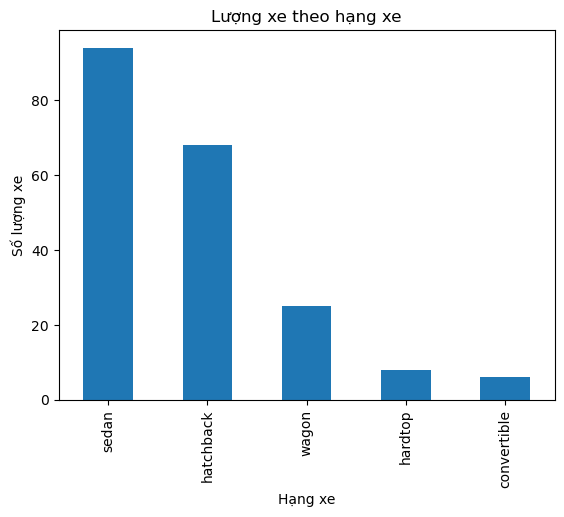

In [83]:
# Biểu đồ bar vertical
body_style_counts.plot.bar(xlabel='Hạng xe', ylabel='Số lượng xe', title="Lượng xe theo hạng xe")

<Axes: title={'center': 'Lượng xe theo hạng xe'}, xlabel='Số lượng xe', ylabel='Hạng xe'>

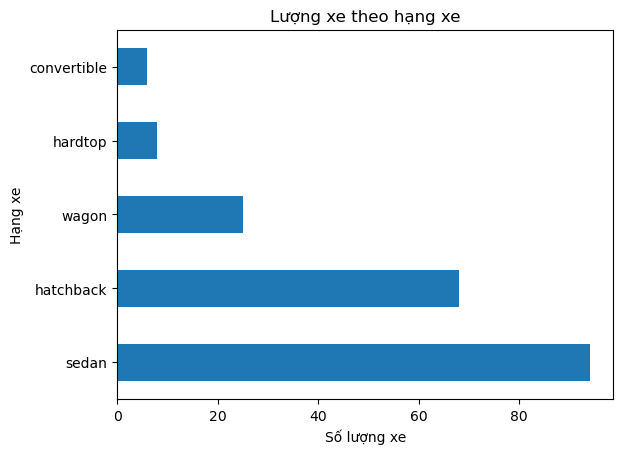

In [85]:
# Biểu đồ bar horizotal
body_style_counts.plot.barh(ylabel='Hạng xe', xlabel='Số lượng xe', title="Lượng xe theo hạng xe")

,Sản phẩm,Doanh thu 2023,Doanh thu 2024
0,A,100,120
1,B,150,180
2,C,200,210
3,D,130,160


<Axes: title={'center': 'So sánh doanh thu theo năm'}, xlabel='Sản phẩm'>

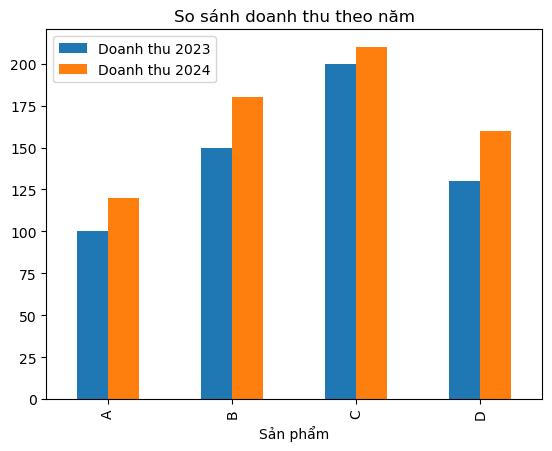

In [87]:
data = {'Sản phẩm': ['A', 'B', 'C', 'D'],
        'Doanh thu 2023': [100, 150, 200, 130],
        'Doanh thu 2024': [120, 180, 210, 160]}

df = pd.DataFrame(data)
display(df) 
# Vẽ biểu đồ cột nhóm
df.plot.bar(x='Sản phẩm', title="So sánh doanh thu theo năm")


<Axes: title={'center': 'Doanh thu với màu tùy chỉnh'}, xlabel='Sản phẩm'>

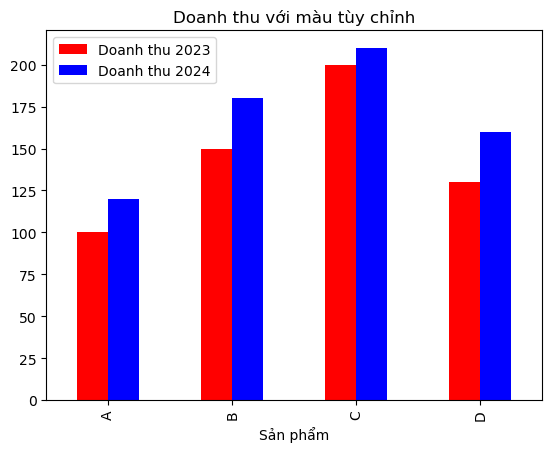

In [88]:
df.plot.bar(x='Sản phẩm', color=['red', 'blue'], title="Doanh thu với màu tùy chỉnh")  

<Axes: title={'center': 'Doanh thu theo năm (Xếp chồng)'}, xlabel='Sản phẩm'>

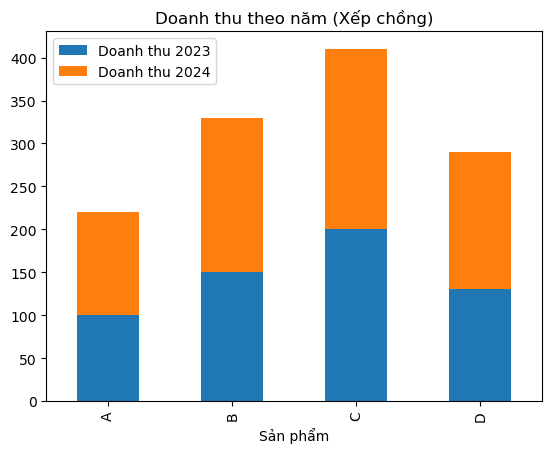

In [89]:
df.plot.bar(x='Sản phẩm', stacked=True, title="Doanh thu theo năm (Xếp chồng)")


In [90]:
mpg = cars.groupby('make', as_index=False)[['city-mpg', 'highway-mpg']].mean()
mpg.head() 

,make,city-mpg,highway-mpg
0,alfa-romero,20.333333,26.666667
1,audi,19.333333,24.500000
2,bmw,19.375000,25.375000
3,chevrolet,41.000000,46.333333
4,dodge,28.000000,34.111111


In [91]:
mpg = mpg.sort_values('city-mpg').head(10)
mpg

,make,city-mpg,highway-mpg
7,jaguar,14.333333,18.333333
15,porsche,17.500000,25.500000
9,mercedes-benz,18.500000,21.000000
10,mercury,19.000000,24.000000
1,audi,19.333333,24.500000
2,bmw,19.375000,25.375000
17,saab,20.333333,27.333333
0,alfa-romero,20.333333,26.666667
21,volvo,21.181818,25.818182
13,peugot,22.454545,26.636364


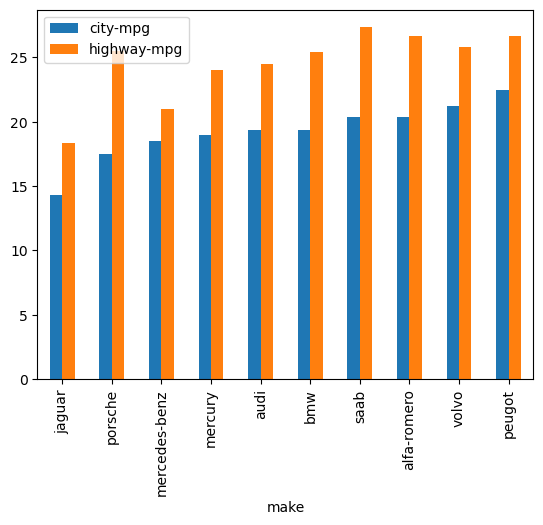

In [92]:
# top 10 hãng xe có city-mpg (mức tiêu thụ nhiên liệu trong thành phố và cao tốc) thấp nhất

mpg.plot.bar(x = 'make');

#### Biểu đồ boxplot  
Biểu đồ Boxplot (hay còn gọi là box-and-whisker plot) là một công cụ trực quan giúp hiển thị phân bố của dữ liệu thông qua các chỉ số thống kê như:  
* Median (trung vị)  
* Quartiles (tứ phân vị)  
* Whiskers (phạm vi dữ liệu không phải ngoại lệ)  
* Outliers (các điểm ngoại lệ)  


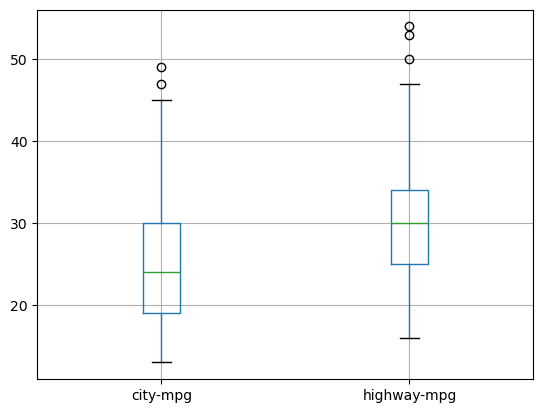

In [93]:
cars.boxplot(['city-mpg', 'highway-mpg']);

**Biểu đồ boxplot trên minh họa:**  

Hộp chữ nhật (box) thể hiện khoảng giá giữa quartile 1 (Q1) và quartile 3 (Q3) – tức là 50% dữ liệu giữa.  
Đường ngang trong hộp là median (trung vị) – giá trị chính giữa.  
"Râu" (whiskers) kéo dài từ hộp tới các giá trị nhỏ nhất và lớn nhất nằm trong khoảng hợp lý (cụ thể là từ Q1 - 1.5×IQR đến Q3 + 1.5×IQR).  
Các dấu chấm ngoài râu là outlier – giá trị ngoại lệ nằm ngoài khoảng này.  

# 📦 Mẹo đọc nhanh Boxplot

| Thành phần           | Ý nghĩa                                                                 |
|----------------------|-------------------------------------------------------------------------|
| Min (Giá trị nhỏ nhất)| Giá trị nhỏ nhất (trong khoảng hợp lý, không tính ngoại lệ)            |
| Q1 (Quartile 1)      | 25% số liệu nhỏ hơn giá trị này                                         |
| Median (Q2)          | Trung vị – 50% số liệu nhỏ hơn, 50% lớn hơn                             |
| Q3 (Quartile 3)      | 75% số liệu nhỏ hơn giá trị này                                         |
| Max (Giá trị lớn nhất)| Giá trị lớn nhất (trong khoảng hợp lý, không tính ngoại lệ)           |
| IQR (Q3 - Q1)        | Khoảng tứ phân vị – độ phân tán dữ liệu trong 50% giữa                 |
| Whiskers (Râu)       | Kéo từ Q1 - 1.5×IQR đến Q3 + 1.5×IQR – giới hạn cho giá trị thường      |
| Outliers (Ngoại lệ)  | Các điểm nằm ngoài khoảng whiskers – thường là điểm bất thường         |

## 📌 Ghi nhớ nhanh
- 🔹 **Hộp càng dài → dữ liệu phân tán nhiều**
- 🔸 **Median lệch khỏi trung tâm → dữ liệu không đối xứng**
- ⚠️ **Nhiều outliers → dữ liệu có nhiều giá trị bất thường**
- ↕️ **Whiskers dài → có thể có phạm vi lớn hoặc nhiều biến động**

> ✅ Boxplot rất tốt để so sánh nhiều nhóm dữ liệu cùng lúc.


#### Biểu đồ Histogram  

Histogram là một biểu đồ giúp hiển thị phân bố tần suất của dữ liệu số theo các khoảng (bins). Khác với biểu đồ cột (bar chart), histogram không hiển thị từng giá trị riêng lẻ mà nhóm chúng vào các khoảng và đếm số lượng phần tử trong mỗi khoảng.  

Pandas hỗ trợ vẽ histogram trực tiếp bằng .plot(kind='hist') hoặc .plot.hist()


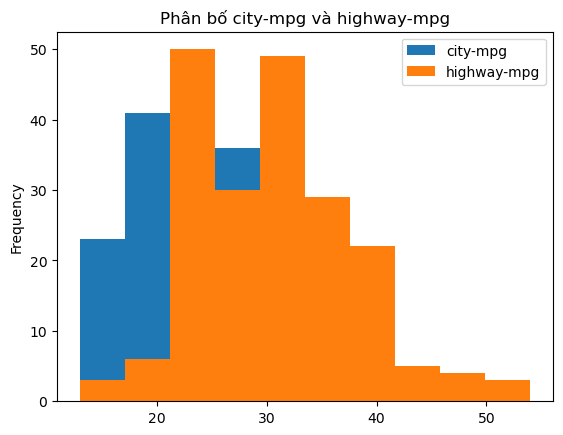

In [94]:
cars[['city-mpg', 'highway-mpg']].plot.hist(title="Phân bố city-mpg và highway-mpg");

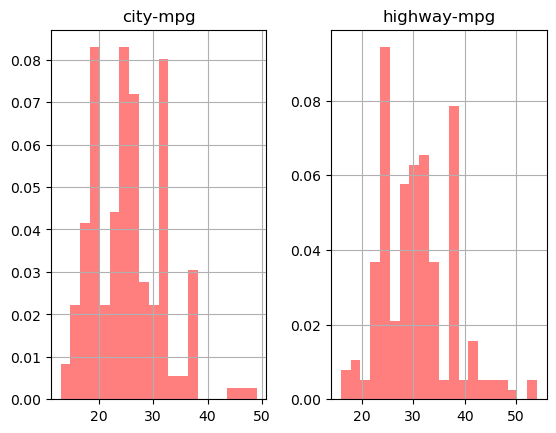

In [95]:
# cars[['city-mpg', 'highway-mpg']].hist(bins=20, alpha=0.5, density=True,orientation='horizontal',color='red'); # Ngang
cars[['city-mpg', 'highway-mpg']].hist(bins=20, alpha=0.5, density=True,color='red'); # Đứng
# alpha=0.5: Làm trong suốt để hiển thị cả hai nhóm.
# bins=20: Chia thành 20 khoảng.
# hiển thị biểu đồ theo dạng tỷ lệ phần trăm thay vì số lượng, sử dụng density=True
# Xoay histogram theo chiều ngang orientation='horizontal'
# Tuỳ chỉnh màu sắc color='red'

### 📈 Biểu đồ KDE (Kernel Density Estimation) trong SciPy  
KDE (Kernel Density Estimation) là một phương pháp ước lượng hàm mật độ xác suất của một tập hợp dữ liệu liên tục. Nó giúp ta hiểu rõ hơn về phân bố của dữ liệu thay vì chỉ dùng histogram. 
Khác với histogram (cột rời rạc), KDE hiển thị đường cong mượt mà thể hiện sự phân bố của dữ liệu.  
⚡ Ưu điểm của KDE:  
✅ Mượt hơn histogram vì không bị ảnh hưởng nhiều bởi số lượng bins.  
✅ Có thể xác định nhiều đỉnh trong phân phối (multimodal).  
✅ Dễ dàng so sánh nhiều tập dữ liệu trên cùng một đồ thị.  
📌 Nhược điểm:  
❌ Chạy chậm hơn histogram nếu dữ liệu lớn.  
❌ Cần chọn bandwidth (độ rộng nhân) phù hợp để có đồ thị tốt.  

In [93]:
# Cài đặt thư viện scipy để thực hiện trực quan hóa trên biểu đồ kde plot
# !pip install scipy

<Axes: ylabel='Density'>

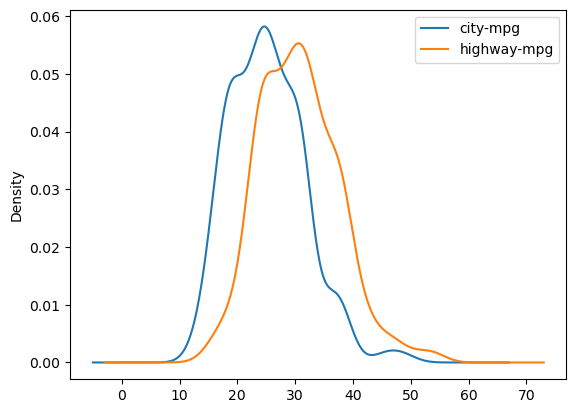

In [96]:
cars[['city-mpg', 'highway-mpg']].plot.kde()

#### Biểu đồ Scatter plot - Biểu đồ phân tán  
**1. Giới thiệu về Scatter Plot**
* Scatter Plot (biểu đồ phân tán) là một loại đồ thị dùng để hiển thị mối quan hệ giữa hai biến số thông qua các điểm dữ liệu.  
* Mỗi điểm trên đồ thị biểu diễn một quan sát với giá trị trên trục hoành (X) và trục tung (Y).  
* Biểu đồ này giúp phát hiện xu hướng, tương quan và sự phân bố dữ liệu.  

**2. Ý nghĩa của Scatter Plot**  
Scatter Plot hữu ích trong nhiều trường hợp như:  
✅ Xác định mối quan hệ giữa hai biến: Có tương quan dương, tương quan âm hay không có tương quan.  
✅ Phát hiện các điểm bất thường (outliers) trong tập dữ liệu.  
✅ Quan sát xu hướng tổng thể của dữ liệu để đưa ra dự đoán.  
✅ So sánh các nhóm dữ liệu khác nhau trên cùng một biểu đồ.  

**3. Các dạng tương quan trong Scatter Plot**  
📊 1. Tương quan dương (Positive Correlation)
Khi giá trị của biến X tăng, biến Y cũng tăng theo.

Ví dụ: Số giờ học tăng → Điểm số tăng.

Biểu đồ có các điểm tạo thành đường chéo hướng lên.

📊 2. Tương quan âm (Negative Correlation)
Khi giá trị của biến X tăng, biến Y giảm.

Ví dụ: Số giờ chơi game tăng → Điểm số giảm.

Các điểm tạo thành đường chéo hướng xuống.

📊 3. Không có tương quan (No Correlation)
Dữ liệu rải rác mà không có xu hướng rõ ràng.

Ví dụ: Chiều cao của người không liên quan đến số điện thoại.

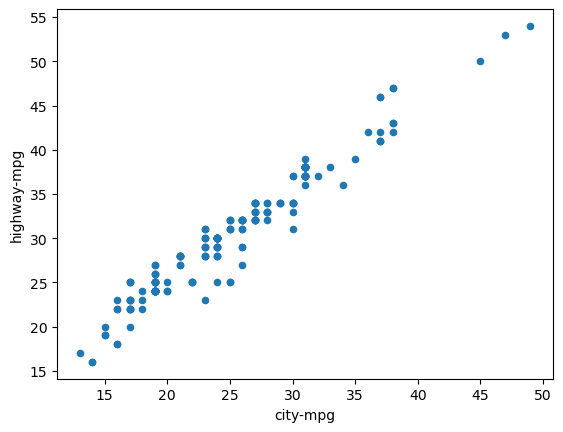

In [97]:
cars.plot.scatter(x = 'city-mpg', y = 'highway-mpg');

,Giờ học,Điểm số
0,2,4
1,3,5
2,5,7
3,6,7
4,8,8
5,10,9


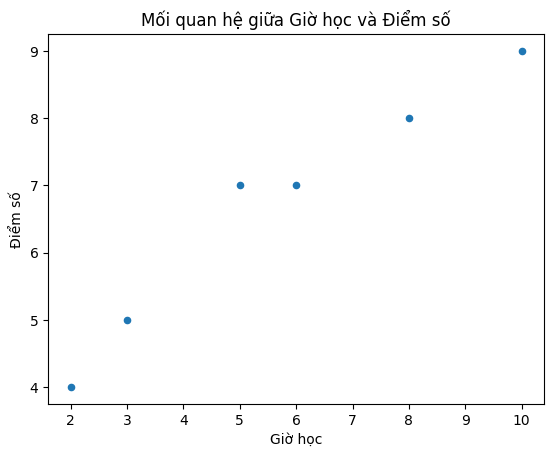

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu ngẫu nhiên
np.random.seed(42)
df = pd.DataFrame({
    'Giờ học': [2,3,5,6,8,10],
    'Điểm số': [4,5,7,7,8,9]
})
display(df)
# Vẽ scatter plot
df.plot.scatter(x='Giờ học', y='Điểm số', title="Mối quan hệ giữa Giờ học và Điểm số")
plt.show()

# 📌 Giải thích:
# x='Giờ học', y='Điểm số': Xác định trục hoành và trục tung.
# .plot.scatter(): Hàm vẽ Scatter Plot trong Pandas.

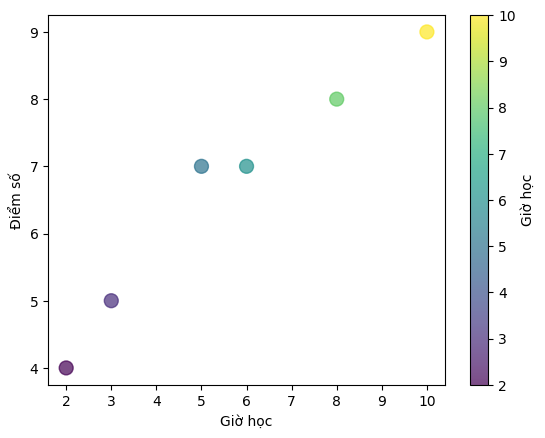

In [97]:
df.plot.scatter(x='Giờ học', y='Điểm số', c='Giờ học', cmap='viridis', s=100, alpha=0.7)
plt.show()

# 📌 Tùy chỉnh:
# c='Giờ học': Màu sắc theo số giờ học.
# cmap='viridis': Bảng màu.
# s=100: Kích thước điểm dữ liệu.
# alpha=0.7: Độ trong suốt của điểm.
